# EX3 - Promoções na TurinGucci

**Autor:** Pedro Gherardi

**Dataset:** https://drive.google.com/file/d/1Ne9FeS4OjnHgDWO-hWyFN73m5aOcDnC1/view

Descrição do Dataset:

**employee_id**: ID único do funcionário; <br>
**department**: departamento do funcionário; <br>
**region**: região de emprego (não ordenada); <br>
**education**: nível educacional do funcionário; <br>
**gender**: gênero do funcionário <br>
**recruitment_channel**: canal de recrutamento para o funcionário; <br>
**no_ of_ trainings**: número de treinamentos completados em anos passados, sejam em soft skills, technical skills, etc. <br>
**age**: idade do funcionário; <br>
**previous_ year_ rating**: avaliação do funcionário para o ano anterior; <br>
**length_ of_ service**: duração do serviço em anos; <br>
**awards_ won?**: se ganhou algum prêmio em anos anteriores, recebe 1, do contrário 0; <br>
**avg_ training_ score**: pontuação média nas avaliações de treinamento atuais; <br>
**is_promoted**: (Target) recomendado ou não para promoção. <br>


## Setup

Importa as principais bibliotecas e dataframe que serão utilizadas para análise 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "J:\Faculdade\Turing USP\TA\Entregáveis\entregavel_3\dataset3.csv" #caminho do arquivo no meu PC, substituir pelo seu
df = pd.read_csv(path, encoding="latin", sep="|")            #dataframe

In [3]:
df.head() 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       49962 non-null  float64
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    47350 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB


## Item A:

In [5]:
df_null = df.isnull().sum()
df_null.head(50)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings         4846
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score      7458
is_promoted                0
dtype: int64

Optei por manter os dados nulos pois seriam muitos para deletar ou substituir podendo interferir na confiabilidade das informações do dataframe <br>

**Dessa forma será feita uma análise de cada feature separdaramente.** <br>
**Dados que não forem condizentes com cada feature serão excluídos do dataframe.** <br>
**Dados iguais escritos de maneiras diferentes serão ajustados** <br>

In [6]:
df['employee_id'].value_counts() #1ª feature (OKAY)

employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64

In [7]:
df['department'].value_counts() #2ª feature ('quem trouxe quenga')


department
Sales & Marketing     16840
Operations            11348
Technology             7138
Procurement            7138
Analytics              5352
Finance                2536
HR                     2418
Legal                  1014
R&D                     999
quem trouxe quenga       25
Name: count, dtype: int64

In [8]:
aux = df[ df['department'] == 'quem trouxe quenga'].index #Separando os dados incorretos 
df.drop(aux , inplace=True) #Remoção

In [9]:
df['region'].value_counts() #3ª feature ('casa da lu na suecia')

region
region_2                12334
region_22                6423
region_7                 4838
region_15                2808
region_13                2648
region_26                2260
region_31                1933
region_4                 1703
region_27                1657
region_16                1465
region_28                1318
region_11                1315
region_23                1175
region_29                 994
region_32                 945
region_19                 874
region_20                 850
region_14                 827
region_25                 819
region_17                 796
region_5                  766
region_6                  690
region_30                 657
region_8                  654
region_10                 648
region_1                  610
region_24                 508
region_12                 499
region_9                  420
region_21                 411
region_3                  346
region_34                 288
region_33                 269
reg

In [10]:
aux = df[ df['region'] == 'casa da lu na suecia'].index #Separando os dados incorretos
df.drop(aux , inplace=True) #Remoção

In [11]:
df['education'].value_counts() #4ª feature (OKAY)

education
Bachelor's          36644
Master's & above    14921
Below Secondary       805
Name: count, dtype: int64

In [12]:
df['gender'].value_counts() #5ª feature ('fEMALE e f' e 'MALE, eu sou homem hetero homossexual! e m')

gender
m                                   34989
f                                   15736
MALE                                 3257
fEMALE                                573
eu sou homem hetero homossexual!      224
Name: count, dtype: int64

In [13]:
# Substitui "MALE" por "m".
df["gender"].replace("MALE", "m", inplace=True)

# Substitui "fEMALE" e "female".
df["gender"].replace("fEMALE", "f", inplace=True)

# Substitui "eu sou homem hetero homossexual!" e "male".
df["gender"].replace("eu sou homem hetero homossexual!", "m", inplace=True)

In [14]:
df['recruitment_channel'].value_counts() #6ª feature (OKAY)

recruitment_channel
other       30428
sourcing    23209
referred     1142
Name: count, dtype: int64

In [15]:
df['no_of_trainings'].value_counts()  #7ª feature (OKAY)

no_of_trainings
1.0     40319
2.0      7338
3.0      1656
4.0       438
5.0       121
6.0        40
7.0        10
9.0         5
8.0         4
10.0        4
Name: count, dtype: int64

In [16]:
df['age'].value_counts() #8ª feature (idades absurdas)             

age
 30        3664
 32        3533
 31        3529
 29        3404
 33        3210
 28        3146
 34        3076
 27        2824
 35        2708
 36        2516
 37        2163
 26        2044
 38        1922
 39        1695
 40        1663
 41        1288
 25        1271
 42        1149
 43         992
 44         847
 24         821
 45         760
 46         696
 48         557
 47         557
 50         520
 49         441
 23         403
 51         389
 53         364
 52         350
 54         312
 55         293
 56         264
 57         238
 22         218
 60         217
 58         213
 59         208
 20         112
 123456     106
 21          93
-32           3
Name: count, dtype: int64

In [17]:
max_value = 100
min_value = 0


df = df[(df['age']<max_value) & (df['age']>min_value)] #Análise do 0.001%

In [18]:
df['previous_year_rating'].value_counts()   #9ª feature (OKAY)

previous_year_rating
3.0    18576
5.0    11721
4.0     9860
1.0     6216
2.0     4220
Name: count, dtype: int64

In [19]:
df['length_of_service'].value_counts()    #10ª feature (OKAY) 

length_of_service
3     7019
4     6829
2     6629
5     5829
7     5548
6     4731
1     4496
8     2883
9     2628
10    2192
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: count, dtype: int64

In [20]:
df['awards_won?'].value_counts() #11ª feature (OKAY)

awards_won?
0    53430
1     1240
Name: count, dtype: int64

In [21]:
df['avg_training_score'].value_counts()  #12ª feature (OKAY)

avg_training_score
50.0    2365
49.0    2279
48.0    2144
51.0    2029
60.0    1819
        ... 
98.0      34
99.0      30
41.0      22
40.0       3
39.0       2
Name: count, Length: 61, dtype: int64

In [22]:
df['is_promoted'].value_counts() #13ª feature (OKAY)

is_promoted
0    50017
1     4653
Name: count, dtype: int64

## Item B:

Decidi fazer uma análise do deesempenho dos funcionários em função de algumas informações pessoais. <br>

**Features e Targets:**  <br>
*Informações Pessoais:* education, gender, age <br>
*Desempenho:* Awards_won, is_promoted, length_of_service, avg_training_score <br>
 


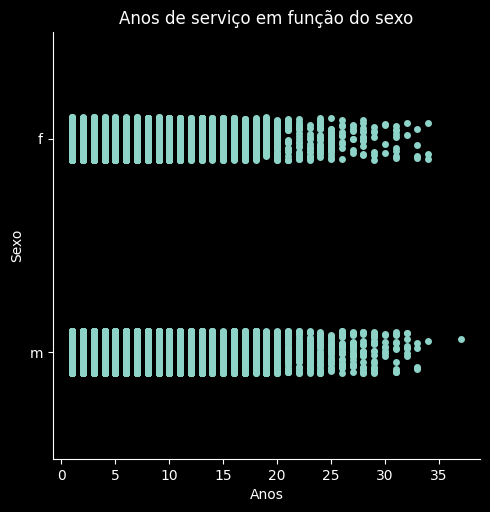

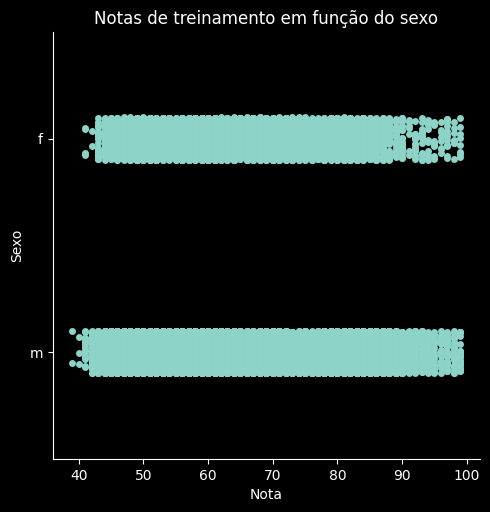

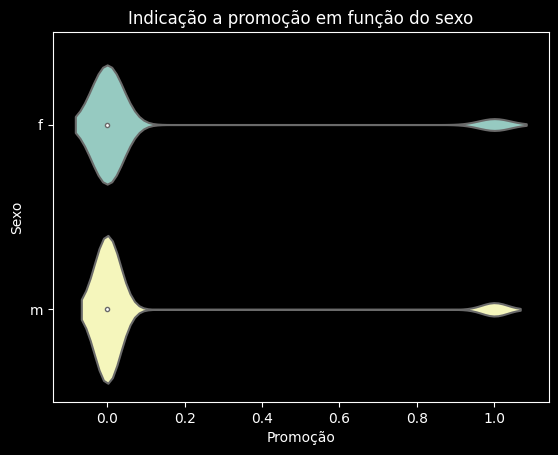

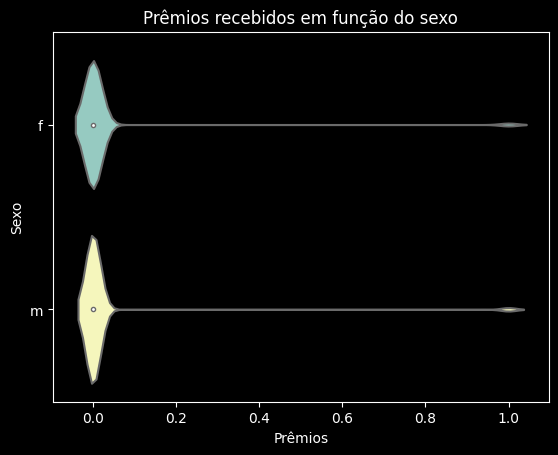

In [23]:
sns.catplot(data=df, x="length_of_service", y="gender")
plt.xlabel("Anos", size=10)
plt.ylabel("Sexo", size=10)
plt.title("Anos de serviço em função do sexo", size=12)
plt.show()

sns.catplot(data=df, x="avg_training_score", y="gender")
plt.xlabel("Nota", size=10)
plt.ylabel("Sexo", size=10)
plt.title("Notas de treinamento em função do sexo", size=12)
plt.show()

sns.violinplot(data=df, x="is_promoted", y="gender")
plt.xlabel("Promoção", size=10)
plt.ylabel("Sexo", size=10)
plt.title("Indicação a promoção em função do sexo", size=12)
plt.show()

sns.violinplot(data=df, x="awards_won?", y="gender")
plt.xlabel("Prêmios", size=10)
plt.ylabel("Sexo", size=10)
plt.title("Prêmios recebidos em função do sexo", size=12)
plt.show()


#Awards_won, is_promoted, length_of_service, avg_training_service

Aqui podemos ver que mesmo as mulheres tendo um desempenho melhor que os homens nos treinamentos atuais, com o mesmo número de anos de serviço, elas possuem menos premiações e uma indicação menor a receber promoção em relação a eles.

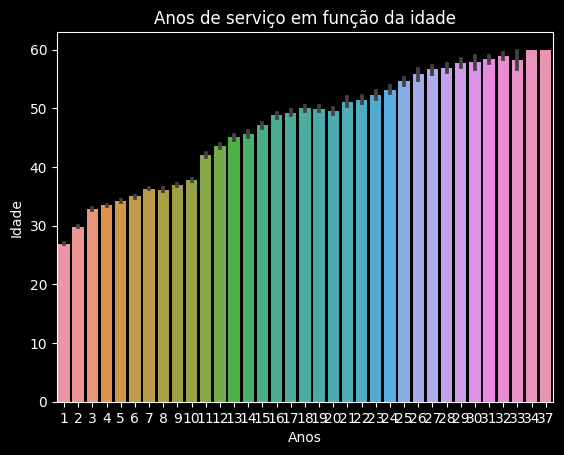

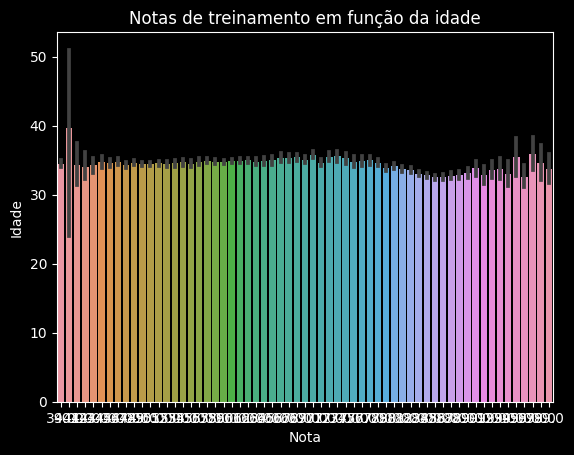

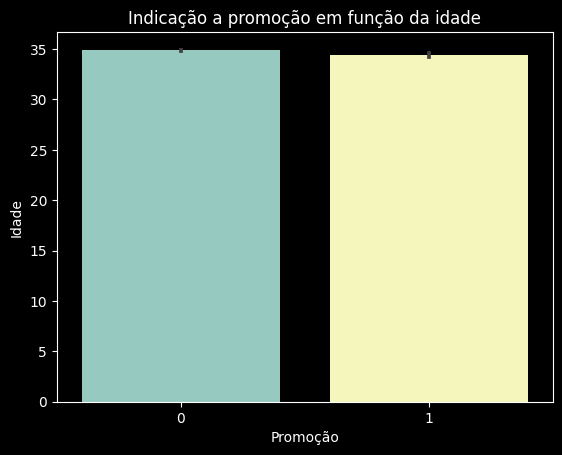

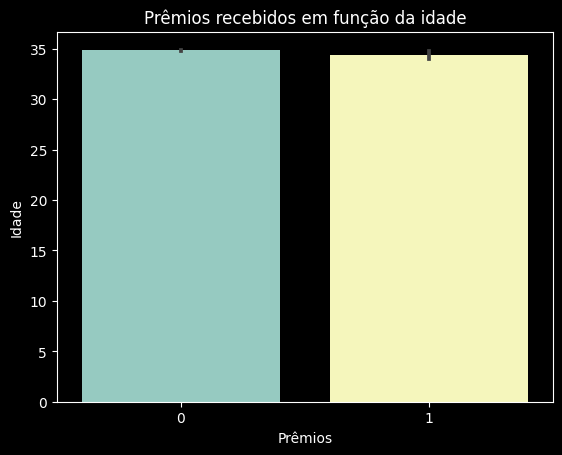

In [24]:
sns.barplot(data=df, x="length_of_service", y="age")
plt.xlabel("Anos", size=10)
plt.ylabel("Idade", size=10)
plt.title("Anos de serviço em função da idade", size=12)
plt.show()

sns.barplot(data=df, x="avg_training_score", y="age")
plt.xlabel("Nota", size=10)
plt.ylabel("Idade", size=10)
plt.title("Notas de treinamento em função da idade", size=12)
plt.show()

sns.barplot(data=df, x="is_promoted", y="age")
plt.xlabel("Promoção", size=10)
plt.ylabel("Idade", size=10)
plt.title("Indicação a promoção em função da idade", size=12)
plt.show()

sns.barplot(data=df, x="awards_won?", y="age")
plt.xlabel("Prêmios", size=10)
plt.ylabel("Idade", size=10)
plt.title("Prêmios recebidos em função da idade", size=12)
plt.show()


#Awards_won, is_promoted, length_of_service, avg_training_service

Podemos notar que funcionarios mais velhos possuem uma quantidade premios maiores por estarem na empresa durante mais tempo, porém funcionários mais novos tendem a receber mais promoções.

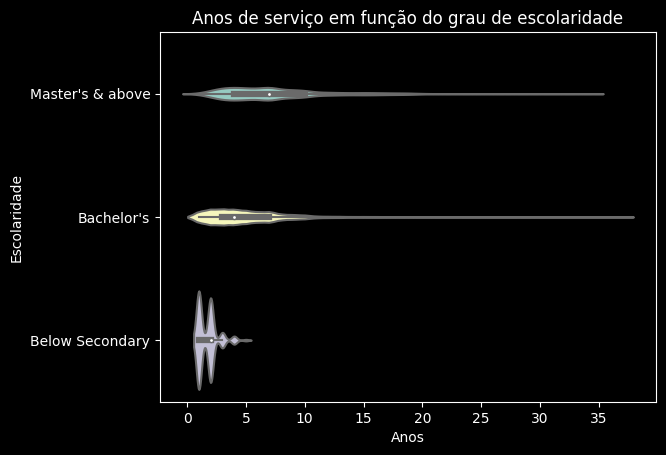

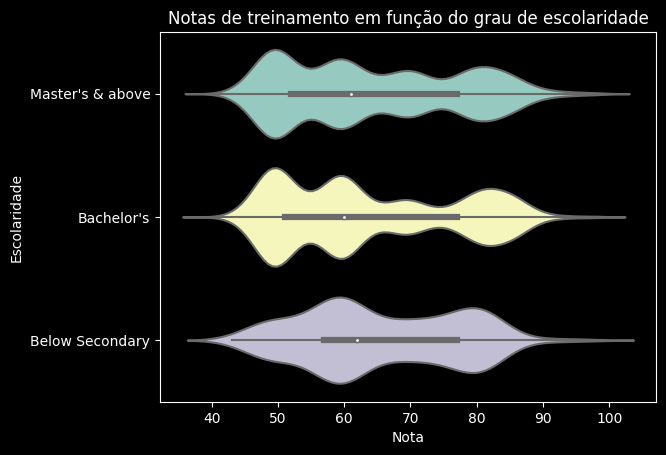

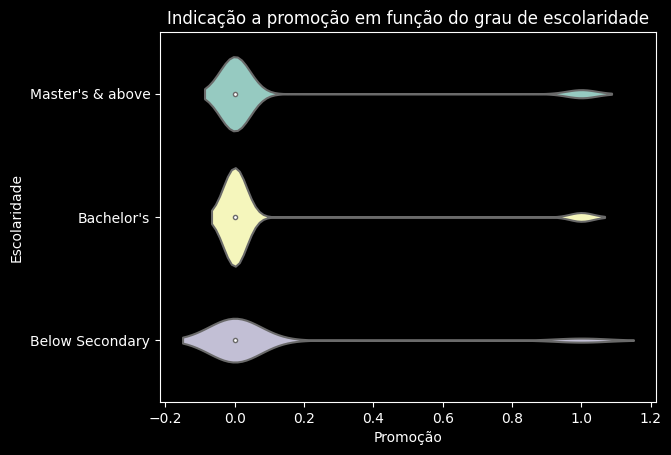

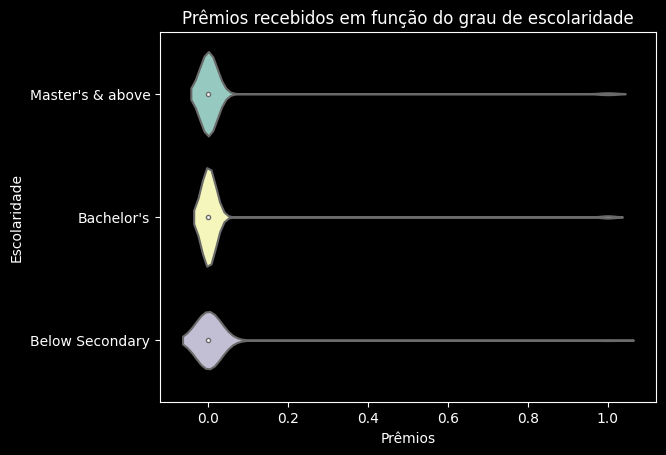

In [25]:
sns.violinplot(data=df, x="length_of_service", y="education")
plt.xlabel("Anos", size=10)
plt.ylabel("Escolaridade", size=10)
plt.title("Anos de serviço em função do grau de escolaridade", size=12)
plt.show()

sns.violinplot(data=df, x="avg_training_score", y="education")
plt.xlabel("Nota", size=10)
plt.ylabel("Escolaridade", size=10)
plt.title("Notas de treinamento em função do grau de escolaridade", size=12)
plt.show()

sns.violinplot(data=df, x="is_promoted", y="education")
plt.xlabel("Promoção", size=10)
plt.ylabel("Escolaridade", size=10)
plt.title("Indicação a promoção em função do grau de escolaridade", size=12)
plt.show()

sns.violinplot(data=df, x="awards_won?", y="education")
plt.xlabel("Prêmios", size=10)
plt.ylabel("Escolaridade", size=10)
plt.title("Prêmios recebidos em função do grau de escolaridade", size=12)
plt.show()

A partir destes gráficos vemos que quanto maior o grau de escolaridade maior o tempo de serviço, indicação a promoção e premios recebidos. As notas de treinamento estão distribuidas de modo as maiores notas são ocupadas por aqueles que possuem maior grau de escolaridade, poém a concentrção de notas baixas é também são maiores neste caso .

## Item C:

In [26]:
from sklearn.preprocessing import OneHotEncoder #Importando o Encoder
enc = OneHotEncoder() 
enc.fit_transform(df) 

<54670x54881 sparse matrix of type '<class 'numpy.float64'>'
	with 710710 stored elements in Compressed Sparse Row format>

## Item D:

In [27]:
from sklearn.preprocessing import MinMaxScaler #Importando o Encoder
dados_numericos = df[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']]
scaler = MinMaxScaler()
scaler.fit_transform(dados_numericos)


array([[0.        , 0.375     , 1.        , ..., 0.        , 0.16666667,
        0.        ],
       [0.        , 0.25      , 1.        , ..., 0.        , 0.35      ,
        0.        ],
       [0.        , 0.35      , 0.5       , ..., 0.        , 0.18333333,
        0.        ],
       ...,
       [0.        , 0.175     , 1.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.        , 0.225     , 0.        , ..., 0.        , 0.1       ,
        0.        ],
       [0.        , 0.175     , 0.        , ..., 0.        , 0.16666667,
        0.        ]])

In [28]:
dados_numericos = dados_numericos.dropna() #Removendo os NaN values

In [29]:
from sklearn.preprocessing import Normalizer #Normalização
norm = Normalizer()
norm.fit_transform(dados_numericos)

array([[0.01640447, 0.57415638, 0.08202234, ..., 0.        , 0.80381893,
        0.        ],
       [0.01483804, 0.44514109, 0.07419018, ..., 0.        , 0.89028219,
        0.        ],
       [0.01640668, 0.55782697, 0.04922003, ..., 0.        , 0.82033378,
        0.        ],
       ...,
       [0.01194802, 0.32259653, 0.0597401 , ..., 0.        , 0.94389356,
        0.        ],
       [0.01865983, 0.54113519, 0.01865983, ..., 0.        , 0.83969254,
        0.        ],
       [0.01779765, 0.4805366 , 0.01779765, ..., 0.        , 0.87208494,
        0.        ]])

## Item E:

In [30]:
#imports necessários
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Lista que guarda a acurácia de cada K (K = 8 ---> acurácia[8])
accuracy = []
accuracy.append(0)

#Divisão de dados teste e dados treinos
X =dados_numericos.drop('is_promoted', axis=1)
y =dados_numericos['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7) 

#Treinamento do modelo de KNN
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

#Analisando com o K com maior acurácia.
print(f'A maior acurácia é {max(accuracy)*100:.2f}%, com K = {accuracy.index(max(accuracy))}')


A maior acurácia é 92.29%, com K = 20


## Item F:

Dados Desbalanceados e como isso pode afetar no desempenho de modelos de Machine Learning:

"Ao treinar um modelo de classificação com a variável desbalanceada, encontraremos alguns problemas. Isso acontece porque o padrão dos dados para a classe dominante vai se sobressair em relação aos da classe com menor frequência. Geralmente, nas bases de dados que possuem a variável alvo desbalanceada, a classe com menor frequência é justamente a que temos interesse em prever, o que torna os problemas ainda maiores.

Como uma das classes tem frequência muito grande, o modelo construído utilizando dados desbalanceados pode apresentar acurácia bem elevada e ainda assim não prever corretamente nenhuma observação para a classe com menor frequência. Isso pode deixar a falsa impressão de que o modelo está com boa performance quando na verdade não está." 

Link: https://site.alura.com.br/artigos/lidando-com-desbalanceamento-dados?utm_term=&utm_campaign=%5BSearch%5D+%5BPerformance%5D+-+Dynamic+Search+Ads+-+Artigos+e+Conte%C3%BAdos&utm_source=adwords&utm_medium=ppc&hsa_acc=7964138385&hsa_cam=11384329873&hsa_grp=111087461203&hsa_ad=662261158752&hsa_src=g&hsa_tgt=aud-546438175126:dsa-843358956400&hsa_kw=&hsa_mt=&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAjw29ymBhAKEiwAHJbJ8ua6IpmM5_9ZY_art2mwJ-sFNmBy2mgfh5AxzkaRqY847xDRl1lvhxoC18YQAvD_BwE

Analisando o modelo que acabamos de treinar é possível identificar que algumas features desse dataset possuem dados desbalanceados, dessa forma, o modelo apesar de ter acurácia acima de 90% possui uma baixa probabilidade de prever corrretamente dados com classe de frequência muito baixa devido a classe de frequência dominantes dessas features que estão com dados desbalanceados. 

Exemplos de features que contém dados desbalanceados:
1- region
2- education
3- no_of_trainings 
4- length_of_service


## Item G:

In [31]:
#imports necessários
from sklearn.metrics import classification_report

#Cálculo da precisão e o recall do modelo treinado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7965
           1       0.92      0.09      0.16       752

    accuracy                           0.92      8717
   macro avg       0.92      0.54      0.56      8717
weighted avg       0.92      0.92      0.89      8717



Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente; <br>
Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas; <br>
Recall/Revocação/Sensibilidade: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas; <br>
F1-Score: média harmônica entre precisão e recall. <br>

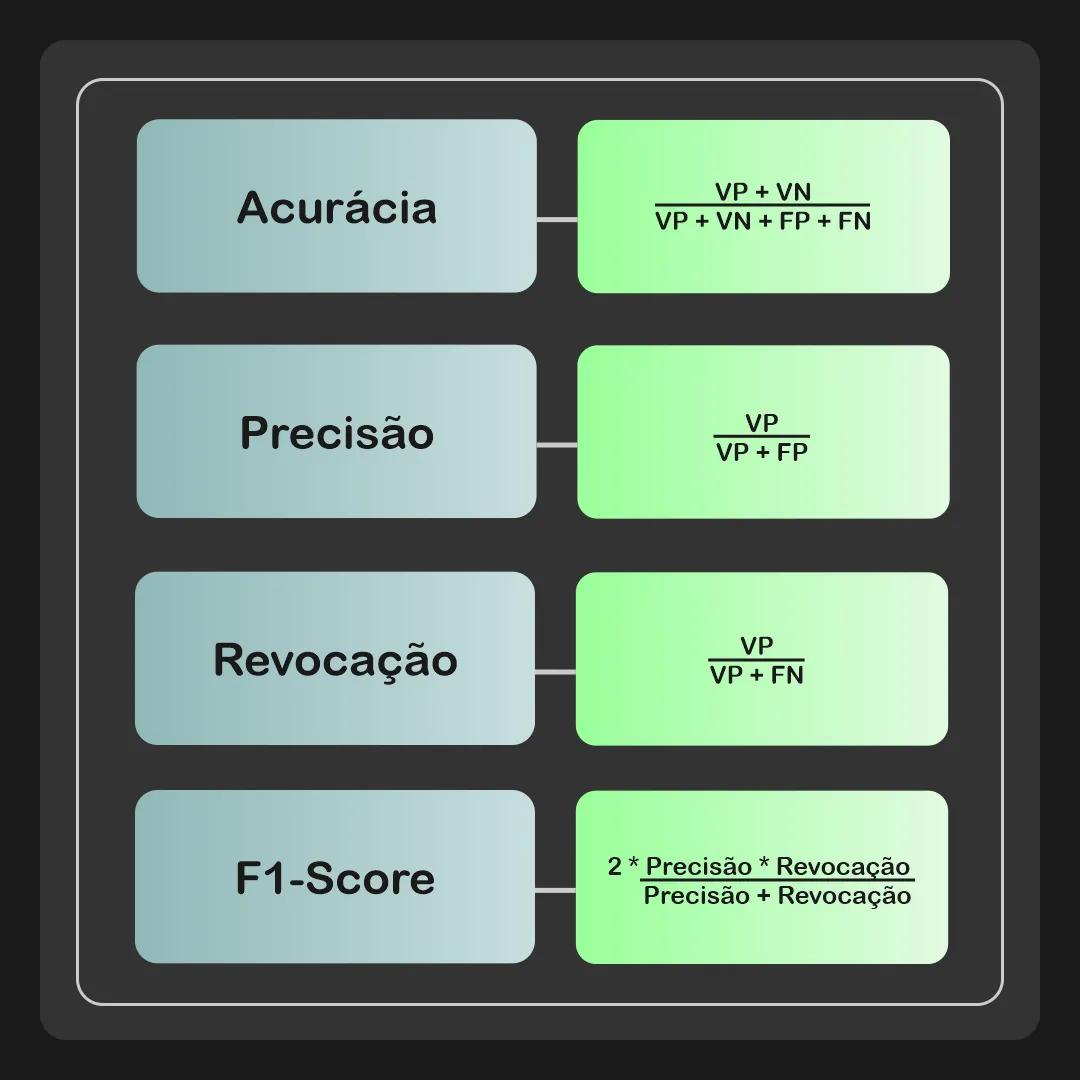

Link: https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

Essas métricas indicam que a as situações como valor esperado a recomendação para promoção tem alta taxa de acerto porém as situações negativas para promoções feitas pelo modelo possuem uma taxa de acerto inferior muito baixa indicando uma falha no modelo. Dessa forma, observa-se que o modelo não foi capaz de fazer classificações de classe Positiva corretamente.


## Item H:

Técnicas de Mchine Learning capazes de minimizar o efeito de classes desbalanceadas:

Oversampling e Undersampling.

A descrição dessas técnicas está presente no link utilizado no item F deste entregável.

Por ser um item opcional tentarei implementar essas técnicas no futuro [**desculpa Feitosa :(**]